## Import Lib

In [1]:
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt

## Load Image

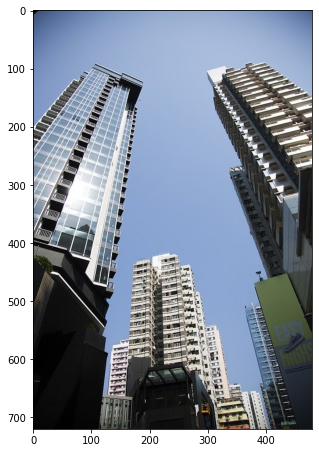

In [2]:
original_img = cv.imread('building.jpg')
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [5, 8]
plt.imshow(RGB_img)
plt.show()

## Create Gaussian Noise

In [3]:
# modified from https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
def gauss_noise(img,mean = 0,var = 200):
    sigma = var ** 0.5
    gaussian1 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian2 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian3 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    noisy_image = np.zeros(img.shape, np.float32)
    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian1
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian2
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian3
    cv.normalize(noisy_image, noisy_image, 0, 255, cv.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

## Create Salt & Pepper

In [4]:
# modified from https://www.py4u.net/discuss/14307
def sp_noise(img,prob=0.05):
    output = np.zeros(img.shape,np.uint8)
    thres = 1 - prob
    ch =  3 if len(output.shape)!=2 else 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = (0,0,0) if ch==3 else 0 #pepper
            elif rdn > thres:
                output[i][j] = (255,255,255) if ch==3 else 255 #salt
            else:
                output[i][j] = img[i][j]
    return output

## Generate Salt and Pepper Noise

In [5]:
sp_img = sp_noise(RGB_img,0.02)
gauss_img = gauss_noise(RGB_img)

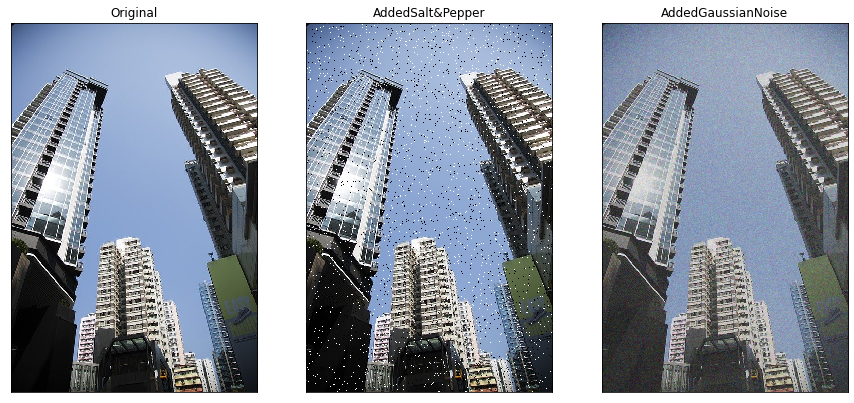

In [6]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.subplot(131),plt.imshow(RGB_img,interpolation='none'),plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(sp_img,interpolation='none'),plt.title('AddedSalt&Pepper'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gauss_img,interpolation='none'),plt.title('AddedGaussianNoise'),plt.xticks([]),plt.yticks([])
plt.show()

## จงแก้ Noise Salt & Peppper

In [7]:
fix_sp_img = cv.medianBlur(sp_img, 3) ## ใช้ฟังก์ชัน medianBlur ลบ Noise ของภาพ

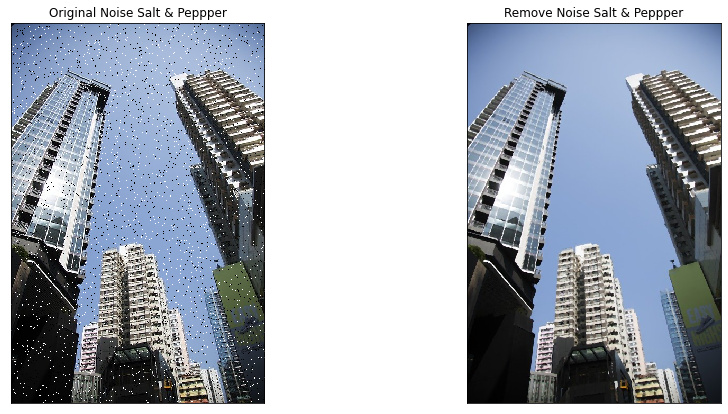

In [8]:
plt.subplot(121),plt.imshow(sp_img,interpolation='none'),plt.title('Original Noise Salt & Peppper'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(fix_sp_img,interpolation='none'),plt.title('Remove Noise Salt & Peppper'),plt.xticks([]),plt.yticks([])
plt.show()

## จงแก้ Noise Gaussian

In [9]:
fix_gauss_img = cv.fastNlMeansDenoisingColored(gauss_img,None,5,5,4,21)

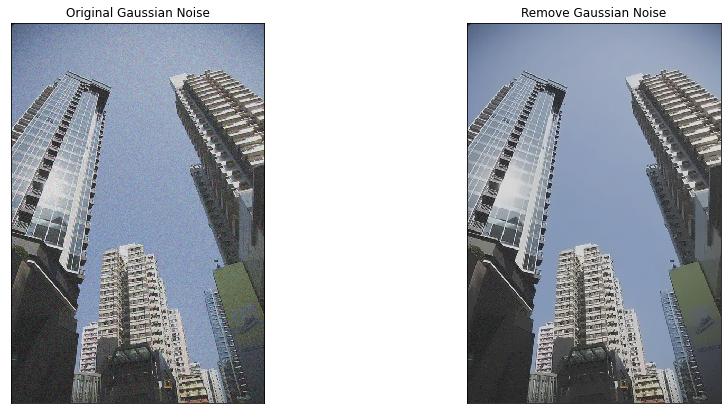

In [10]:
plt.subplot(121),plt.imshow(gauss_img,interpolation='none'),plt.title('Original Gaussian Noise'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(fix_gauss_img,interpolation='none'),plt.title('Remove Gaussian Noise'),plt.xticks([]),plt.yticks([])
plt.show()